In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank_Churnere.csv")


del df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
del df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
train = df 

fd=pd.read_csv("Bank_Churnere.csv")
del fd["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
del fd["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
del fd["Attrition_Flag"]
test = fd  
train.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0.409091,1,2,2,1,1,0,0.534884,3,1,2,0.077747,0.495431,0.079970,0.972136,0.040813,0.118644,0.604136,0.311311
1,1,0.363636,1,5,5,1,0,0,0.418605,5,3,2,0.160522,0.582837,0.152928,0.550310,0.048793,0.271186,0.481536,0.217217
2,1,0.704545,0,2,2,1,4,0,0.813953,5,2,2,0.030162,0.270163,0.050792,0.828173,0.074848,0.161017,0.430576,0.279279
3,1,0.431818,0,2,2,1,2,0,0.558140,6,1,2,0.393972,0.459674,0.385652,0.654799,0.049216,0.093220,0.650665,0.080080
4,1,0.477273,1,1,1,0,2,0,0.674419,5,2,0,0.590751,0.715137,0.555617,0.608359,0.047168,0.144068,0.665436,0.086086


In [3]:
train.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000,9485.000000
mean,0.830469,0.463030,0.461044,2.351292,2.567317,1.349394,2.620770,0.166052,0.534511,3.851977,2.346653,2.461044,0.210983,0.455825,0.210553,0.482437,0.248350,0.454990,0.492096,0.277984
std,0.375240,0.181118,0.498506,1.297383,1.484500,0.620549,1.383951,0.668117,0.184989,1.549757,1.012480,1.110077,0.271437,0.324572,0.260330,0.141403,0.187461,0.182567,0.145674,0.278558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.340909,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.441860,3.000000,2.000000,2.000000,0.032097,0.000000,0.036508,0.390867,0.116862,0.296610,0.401034,0.000000
50%,1.000000,0.454545,0.000000,2.000000,2.000000,1.000000,3.000000,0.000000,0.534884,4.000000,2.000000,2.000000,0.089205,0.500199,0.096080,0.472910,0.237255,0.483051,0.491876,0.178178
75%,1.000000,0.590909,1.000000,3.000000,3.000000,2.000000,4.000000,0.000000,0.627907,5.000000,3.000000,3.000000,0.276975,0.703615,0.273491,0.565015,0.293250,0.584746,0.578287,0.513514
max,1.000000,1.000000,1.000000,5.000000,5.000000,2.000000,4.000000,3.000000,1.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9485 entries, 0 to 9484
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9485 non-null   int64  
 1   Customer_Age              9485 non-null   float64
 2   Gender                    9485 non-null   int64  
 3   Dependent_count           9485 non-null   int64  
 4   Education_Level           9485 non-null   int64  
 5   Marital_Status            9485 non-null   int64  
 6   Income_Category           9485 non-null   int64  
 7   Card_Category             9485 non-null   int64  
 8   Months_on_book            9485 non-null   float64
 9   Total_Relationship_Count  9485 non-null   int64  
 10  Months_Inactive_12_mon    9485 non-null   int64  
 11  Contacts_Count_12_mon     9485 non-null   int64  
 12  Credit_Limit              9485 non-null   float64
 13  Total_Revolving_Bal       9485 non-null   float64
 14  Avg_Open

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

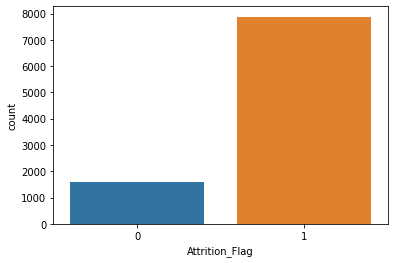

In [6]:
#GRAPHICAL ANALYSIS
sns.countplot(x = 'Attrition_Flag',data = train)

<AxesSubplot:xlabel='Card_Category'>

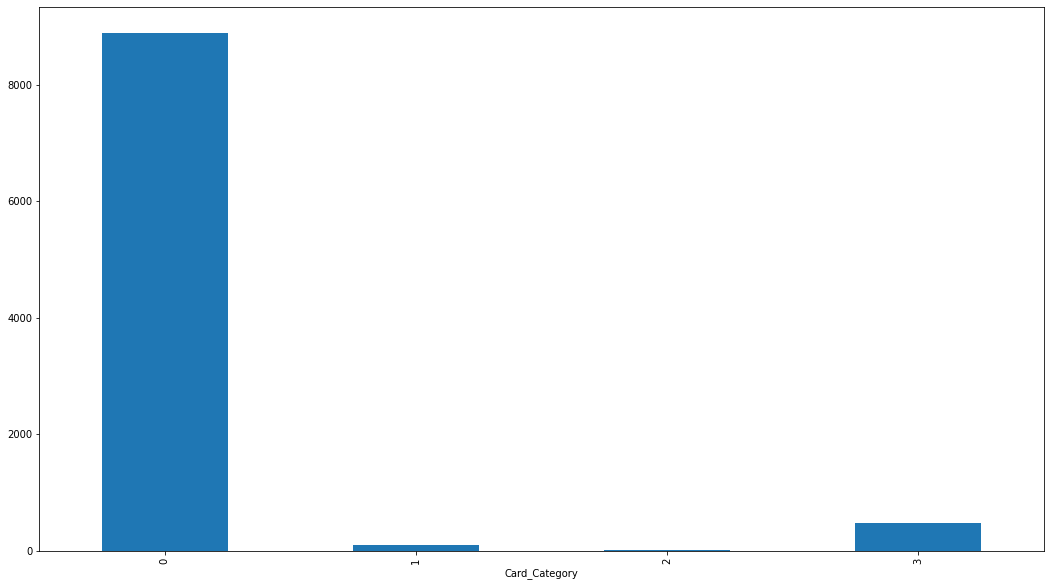

In [7]:
fig,ax = plt.subplots(figsize = (18,10)) 
x = train.groupby('Card_Category')[['Attrition_Flag']].size()
x.plot.bar()

In [8]:
train.groupby('Attrition_Flag')['Avg_Utilization_Ratio'].count()

Attrition_Flag
0    1608
1    7877
Name: Avg_Utilization_Ratio, dtype: int64

In [9]:
def facet(data,y):
    g = sns.FacetGrid(data,col = 'Attrition_Flag',size = 5)
    g.map(plt.hist,y,alpha = 0.5)
    g.add_legend()
    plt.show()

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


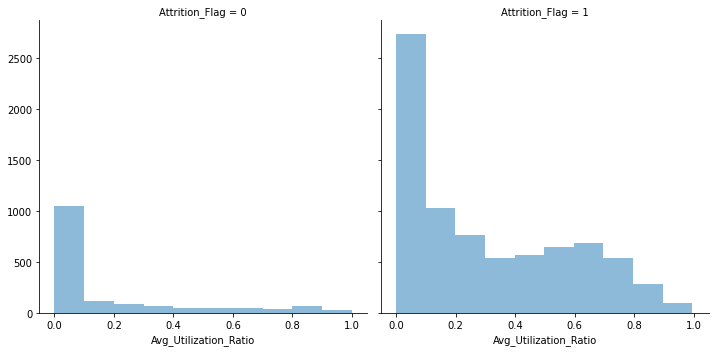

In [10]:
facet(train,'Avg_Utilization_Ratio')

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


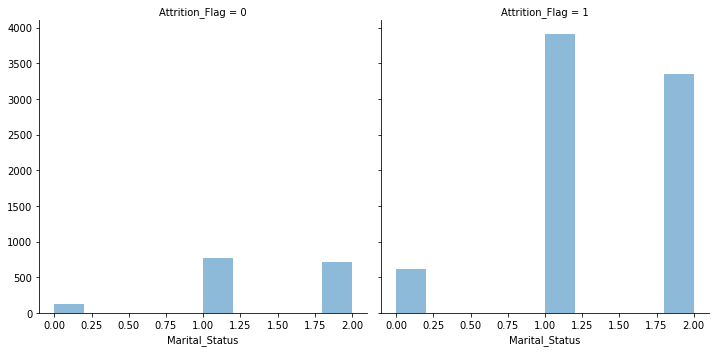

In [11]:
facet(train,'Marital_Status')

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


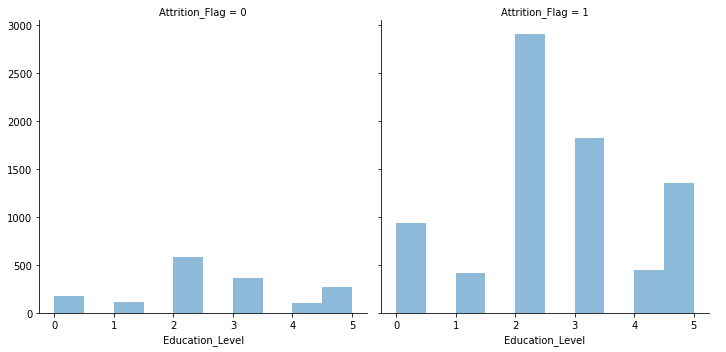

In [12]:
facet(train,'Education_Level')

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


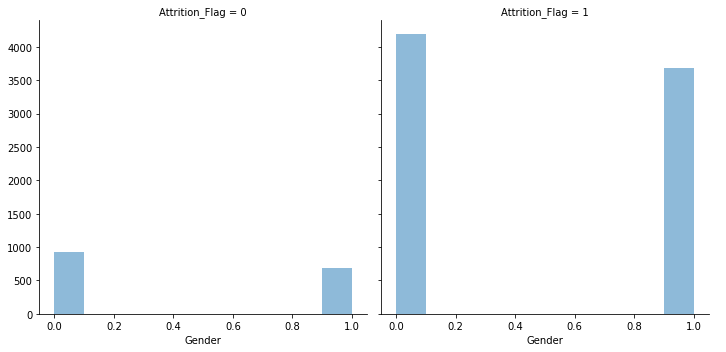

In [13]:
facet(train,'Gender')

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


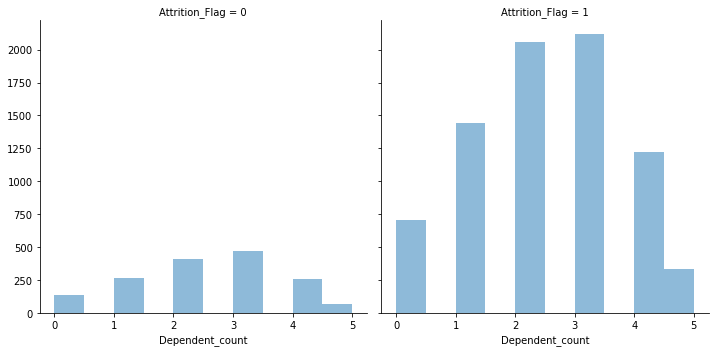

In [14]:
facet(train,'Dependent_count')

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


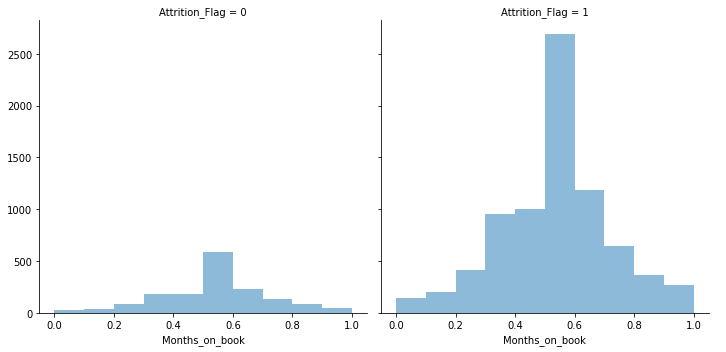

In [15]:
facet(train,'Months_on_book')

In [16]:
#Checking Correlation between different variables
corr_matrix = train.corr()
corr_matrix

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.015680,0.031768,-0.017570,0.002318,-0.009136,-0.014782,-0.001678,-0.009530,0.164450,-0.154747,-0.207983,0.015977,0.261440,-0.007806,0.110350,0.156285,0.389972,0.320583,0.186196
Customer_Age,-0.015680,1.000000,-0.015780,-0.129772,-0.006478,0.000465,-0.013281,-0.013189,0.787979,-0.021488,0.050828,-0.018183,0.004902,0.013243,0.003695,-0.083596,-0.027638,-0.052024,-0.034137,0.003799
Gender,0.031768,-0.015780,1.000000,0.001924,0.011274,-0.003374,-0.431849,0.080050,-0.003481,0.010960,-0.013352,0.043797,0.423197,0.029724,0.420201,0.002156,-0.016807,-0.098226,-0.036200,-0.253087
Dependent_count,-0.017570,-0.129772,0.001924,1.000000,-0.002590,-0.029229,-0.024042,0.023686,-0.112149,-0.043778,-0.007790,-0.042039,0.067222,-0.001713,0.067331,-0.029095,0.041073,0.061167,0.015713,-0.035294
Education_Level,0.002318,-0.006478,0.011274,-0.002590,1.000000,-0.001498,-0.009770,-0.009836,-0.007106,0.024635,0.004256,0.013893,-0.001664,0.000125,-0.001674,0.008915,0.001950,-0.005740,-0.001455,0.007468
Marital_Status,-0.009136,0.000465,-0.003374,-0.029229,-0.001498,1.000000,-0.001624,0.027137,0.003185,-0.023183,0.002382,0.014251,0.018405,-0.029404,0.021066,-0.012265,0.050242,0.078203,0.018811,-0.021326
Income_Category,-0.014782,-0.013281,-0.431849,-0.024042,-0.009770,-0.001624,1.000000,-0.049800,-0.013406,0.004895,0.017677,-0.020702,-0.263474,-0.019158,-0.261549,-0.000956,0.002084,0.033120,0.023848,0.166095
Card_Category,-0.001678,-0.013189,0.080050,0.023686,-0.009836,0.027137,-0.049800,1.000000,-0.013764,-0.062105,-0.018234,0.000548,0.472189,0.012004,0.470770,0.007918,0.150555,0.084122,-0.005114,-0.198446
Months_on_book,-0.009530,0.787979,-0.003481,-0.112149,-0.007106,0.003185,-0.013406,-0.013764,1.000000,-0.017906,0.071596,-0.010483,0.006026,0.005438,0.005527,-0.059634,-0.017574,-0.036628,-0.026859,-0.009575
Total_Relationship_Count,0.164450,-0.021488,0.010960,-0.043778,0.024635,-0.023183,0.004895,-0.062105,-0.017906,1.000000,-0.005194,0.047886,-0.058678,0.022102,-0.060647,0.047014,-0.339839,-0.204794,0.042266,0.060650


<AxesSubplot:>

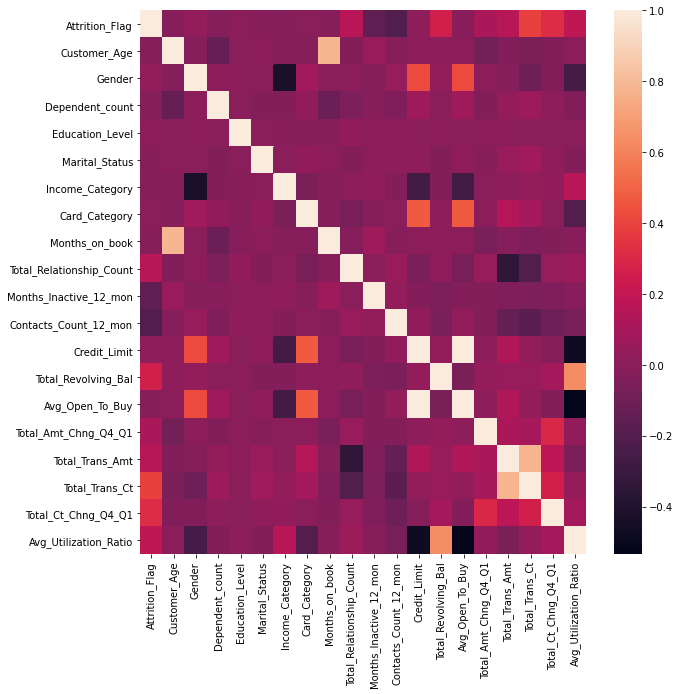

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,data = train)

In [18]:
# Deleting the variables which has high correlation with other variables

col_drop = ['Marital_Status','Gender','Customer_Age']
train = train.drop(columns = col_drop,axis = 1)
test = test.drop(columns = col_drop,axis = 1)
train.head()

,Attrition_Flag,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,2,2,1,0,0.534884,3,1,2,0.077747,0.495431,0.079970,0.972136,0.040813,0.118644,0.604136,0.311311
1,1,5,5,0,0,0.418605,5,3,2,0.160522,0.582837,0.152928,0.550310,0.048793,0.271186,0.481536,0.217217
2,1,2,2,4,0,0.813953,5,2,2,0.030162,0.270163,0.050792,0.828173,0.074848,0.161017,0.430576,0.279279
3,1,2,2,2,0,0.558140,6,1,2,0.393972,0.459674,0.385652,0.654799,0.049216,0.093220,0.650665,0.080080
4,1,1,1,2,0,0.674419,5,2,0,0.590751,0.715137,0.555617,0.608359,0.047168,0.144068,0.665436,0.086086


<AxesSubplot:>

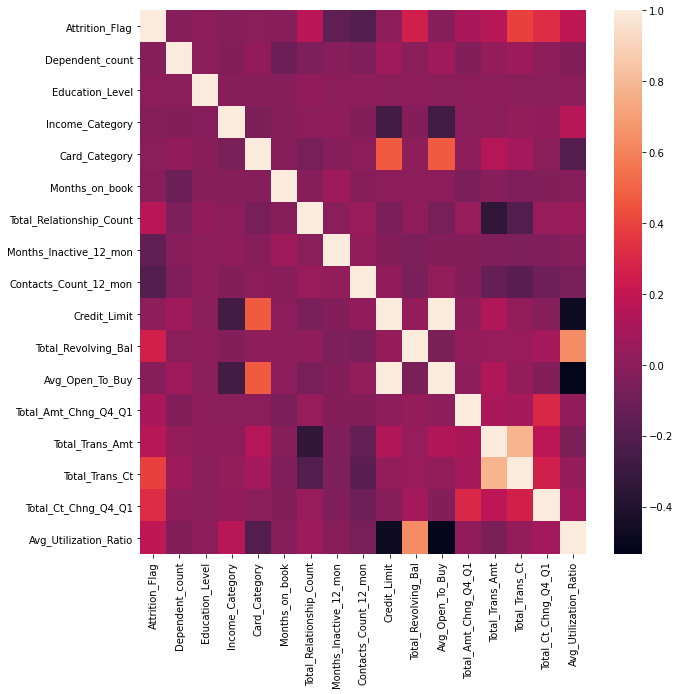

In [19]:
corr_matrix = train.corr()
corr_matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,data = train)

In [20]:
# Building a churn prediction model
X = train.drop(['Card_Category','Attrition_Flag'],axis = 1)
y = train['Attrition_Flag']
X.columns

Index(['Dependent_count', 'Education_Level', 'Income_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [21]:
train.columns

Index(['Attrition_Flag', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
type(X_std)

numpy.ndarray

In [23]:
df = pd.DataFrame(X_std, index = train.index, columns = train.columns[1:16])
df['Card_Category'] = train['Card_Category']
df['Attrition_Flag'] = train['Attrition_Flag']
df.head()

,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
0,-0.270784,-0.382180,-1.171179,0,-0.549778,-1.330123,-0.415348,-0.490879,0.122034,-0.501635,3.463324,-1.107152,-1.842417,0.769154,0.119647,1
1,2.041685,1.638809,-1.893786,0,0.740815,0.645328,-0.415348,-0.185913,0.391343,-0.221367,0.480021,-1.064585,-1.006830,-0.072492,-0.218161,1
2,-0.270784,-0.382180,0.996641,0,0.740815,-0.342398,-0.415348,-0.666195,-0.572051,-0.613719,2.445169,-0.925586,-1.610310,-0.422333,0.004649,1
3,-0.270784,-0.382180,-0.448572,0,1.386112,-1.330123,-0.415348,0.674185,0.011862,0.672639,1.219004,-1.062325,-1.981682,1.088573,-0.710498,1
4,-1.041607,-1.055843,-0.448572,0,0.740815,-0.342398,-2.217120,1.399175,0.798980,1.325557,0.890567,-1.073249,-1.703153,1.189976,-0.688936,1


In [24]:
X_new = df.drop(['Card_Category','Attrition_Flag'],axis = 1)
y_new = df['Attrition_Flag']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3,random_state = 42)

In [25]:
X_train.shape

(6639, 14)

In [26]:
y_train.shape

(6639,)

In [27]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 42)
for_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [28]:
predict = for_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,accuracy_score
predict

array([0.86, 0.98, 1.  , ..., 0.  , 1.  , 1.  ])

In [29]:
accuracy_score(predict.round(),y_test)

0.9532677442023894

In [30]:
mse = mean_squared_error(predict.round(),y_test)
rmse = np.sqrt(mse)
rmse

0.2161764459824675

In [31]:
# Fine-Tune Model
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[10,100,1000] ,'max_features':[2,4,6,8,16]}]   
param_grid


[{'n_estimators': [10, 100, 1000], 'max_features': [2, 4, 6, 8, 16]}]

In [32]:
grid_search = GridSearchCV(for_reg,param_grid,cv = 3,scoring = 'neg_mean_squared_error',return_train_score = True,n_jobs = 3)
grid_search.fit(X_train,y_train)

c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.05167646 -0.04272912 -0.04179819 -0.04152583 -0.03612589 -0.0354173
 -0.03967616 -0.03475132 -0.03389257 -0.03860521 -0.0345097  -0.03397015
         nan         nan         nan]
  warnings.warn(
c:\users\liubomyr\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-0.00902847 -0.00589022 -0.00560926 -0.00733921 -0.0048824  -0.00472506
 -0.00728272 -0.00470964 -0.0045458  -0.00679093 -0.00468408 -0.00453595
         nan         nan         nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=3,
             param_grid=[{'max_features': [2, 4, 6, 8, 16],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 1000}

In [34]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=1000, random_state=42)

In [35]:
y_pred = grid_search.predict(X_test)
y_pred = y_pred.round()
score = accuracy_score(y_pred,y_test)
print( "Accuracys is"+" "+ str(score*100),"%")

Accuracys is 95.81869290231904 %


In [36]:
#Creating Test Dataset
test

,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,2,2,1,0,0.534884,3,1,2,0.077747,0.495431,0.079970,0.972136,0.040813,0.118644,0.604136,0.311311
1,5,5,0,0,0.418605,5,3,2,0.160522,0.582837,0.152928,0.550310,0.048793,0.271186,0.481536,0.217217
2,2,2,4,0,0.813953,5,2,2,0.030162,0.270163,0.050792,0.828173,0.074848,0.161017,0.430576,0.279279
3,2,2,2,0,0.558140,6,1,2,0.393972,0.459674,0.385652,0.654799,0.049216,0.093220,0.650665,0.080080
4,1,1,2,0,0.674419,5,2,0,0.590751,0.715137,0.555617,0.608359,0.047168,0.144068,0.665436,0.086086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,1,2,4,0,0.860465,4,1,4,0.068013,0.240763,0.089213,0.348297,0.994634,0.932203,0.563516,0.164164
9481,2,3,1,0,0.279070,4,2,3,0.085819,0.868494,0.060499,0.529412,0.582827,0.500000,0.483752,0.511512
9482,1,3,4,0,0.534884,5,3,4,0.120042,0.000000,0.156637,0.541022,0.690651,0.423729,0.583456,0.000000
9483,2,2,1,0,0.534884,4,3,3,0.116172,0.000000,0.152928,0.321207,0.556772,0.440678,0.512555,0.000000


In [37]:
X_new_test = test.drop(['Dependent_count','Card_Category'],axis = 1)
X_test_std = scaler.fit_transform(X_new_test)
df_test = pd.DataFrame(X_test_std,columns = test.columns[2:])
df_test

,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.382180,-1.171179,0.002015,-0.549778,-1.330123,-0.415348,-0.490879,0.122034,-0.501635,3.463324,-1.107152,-1.842417,0.769154,0.119647
1,1.638809,-1.893786,-0.626592,0.740815,0.645328,-0.415348,-0.185913,0.391343,-0.221367,0.480021,-1.064585,-1.006830,-0.072492,-0.218161
2,-0.382180,0.996641,1.510671,0.740815,-0.342398,-0.415348,-0.666195,-0.572051,-0.613719,2.445169,-0.925586,-1.610310,-0.422333,0.004649
3,-0.382180,-0.448572,0.127736,1.386112,-1.330123,-0.415348,0.674185,0.011862,0.672639,1.219004,-1.062325,-1.981682,1.088573,-0.710498
4,-1.055843,-0.448572,0.756343,0.740815,-0.342398,-2.217120,1.399175,0.798980,1.325557,0.890567,-1.073249,-1.703153,1.189976,-0.688936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,-0.382180,0.996641,1.762114,0.095519,-1.330123,1.386424,-0.526744,-0.662637,-0.466128,-0.948681,3.981216,2.614047,0.490295,-0.408627
9481,0.291483,-1.171179,-1.380921,0.095519,-0.342398,0.485538,-0.461140,1.271496,-0.576432,0.332224,1.784343,0.246550,-0.057282,0.838388
9482,0.291483,0.996641,0.002015,0.740815,0.645328,1.386424,-0.335055,-1.404462,-0.207120,0.414333,2.359553,-0.171243,0.627189,-0.997995
9483,-0.382180,-1.171179,0.002015,0.095519,0.645328,0.485538,-0.349312,-1.404462,-0.221367,-1.140269,1.645343,-0.078400,0.140454,-0.997995


In [38]:
predict_test = grid_search.predict(df_test)
pred_value_1 = predict_test.round()
pred_value_1 = np.where(pred_value_1 == 0,'no','yes')
pred_value_1

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'no'], dtype='<U3')

In [39]:
result = pd.DataFrame({'Dependent_count':test.Dependent_count,"Attrition_Flag":pred_value_1})
result

,Dependent_count,Attrition_Flag
0,2,yes
1,5,yes
2,2,yes
3,2,yes
4,1,yes
...,...,...
9480,1,yes
9481,2,no
9482,1,no
9483,2,no


In [40]:
result.to_csv('Task_5_test_1.csv',index = False)